<a href="https://colab.research.google.com/github/Vamsikrishna1804/INFO-5505-Advanced-Machine-Learning-for-Data-Scientists-/blob/main/Muktinutalapati_Assignment4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Dataset**: [Breast Cancer Wisconsin Dataset](https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data?resource=download)


In [ ]:
#importing necessary libraries

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

**Loading the dataset**

In [ ]:
df=pd.read_csv('data.csv')
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


From the above dataframe, it is evident that 33 column is empty which is of no use and also id field which is numerical discrete is also of no use as it doesn't add any value for our model. For model effectiveness, these two fields are removed.

**Data Preprocessing**

In [ ]:
del df['id']
del df['Unnamed: 32']

print('the number of columns: ', len(df.columns))

the number of columns:  31


**Descriptive Statistics of Data**

In [ ]:
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


From the above statistics, it is evident that values of min, max,standard deviation and mean have values in different scales. In this random forest model is capable of handling different scale data as it will make local optimums. Hence Standardization or Normalization techniques are not required to apply for this model.

**Explore missing values**

In [ ]:
df.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

As data does not have any missing values, we can use this cleaned dataset for modeling.

In this dataset, dependent variable is diagonsis which is mentioned as Malignant (M) or Benign (B). In order to classify this by random forest model, we will be assigning 1 to Malignant and 0 if the diagnosis is Benign. 

Dependent variable distribution is plotted below to find out how data distribution is done in the dataset.

In [ ]:

print( 'class distribution in the dependent variable: \n',df['diagnosis'].value_counts())

class distribution in the dependent variable: 
 B    357
M    212
Name: diagnosis, dtype: int64


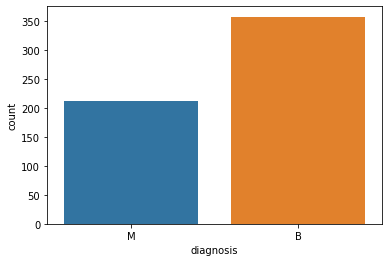

In [ ]:
sns.countplot(x='diagnosis', data=df)
plt.show()

From the above count plot, it is seen that there are benign type more in the dataset.

For the model classification, converting the descriptive values into binary for the dependent variable.

In [ ]:
df['diagnosis'] = np.where(df['diagnosis']=='M',1, 0)
df['diagnosis'].value_counts()
df.head(25)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.990,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.71190,0.26540,0.4601,0.11890
1,1,20.570,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.24160,0.18600,0.2750,0.08902
2,1,19.690,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.45040,0.24300,0.3613,0.08758
3,1,11.420,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.68690,0.25750,0.6638,0.17300
4,1,20.290,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.40000,0.16250,0.2364,0.07678
5,1,12.450,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.53550,0.17410,0.3985,0.12440
6,1,18.250,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.37840,0.19320,0.3063,0.08368
7,1,13.710,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.26780,0.15560,0.3196,0.11510
8,1,13.000,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.53900,0.20600,0.4378,0.10720
9,1,12.460,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.10500,0.22100,0.4366,0.20750


**Splitting the data into training and testing datasets**


In this we are splitting the training data into 80% and testing data into 20%. On Training data, we are also performing k-fold cross validation (where 10 folds are performed in which 9 folds will be used for training and 1 fold is for validating the datasets). 

In [ ]:
# Spliting the data into training (80%) and testing (20%) sets
from sklearn.model_selection import train_test_split
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']
X_train, X_test, y_train, y_test = train_test_split (X, y,train_size = 0.8)
print ('Shapes of X_train, y_train: ', X_train.shape, y_train.shape)
print ('Shapes of X_test, y_test: ', X_test.shape, y_test.shape)

Shapes of X_train, y_train:  (455, 30) (455,)
Shapes of X_test, y_test:  (114, 30) (114,)


**Building Random Forest Model**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_model1 = RandomForestClassifier (random_state = 42)

In [ ]:
# Validate the model's performance using k-fold cross validation
from sklearn.model_selection import cross_validate
cv = cross_validate (rf_model1, X_train, y_train, cv = 10)
print(" Random Forest model1 accuracy score of 10-fold cross validation:\n", cv['test_score'])
print(" Random Forest model1 cross validation accuracy mean score: \n", cv['test_score'].mean())

 Random Forest model1 accuracy score of 10-fold cross validation:
 [0.93478261 0.97826087 0.97826087 1.         0.97826087 1.
 0.91111111 0.97777778 0.86666667 0.97777778]
 Random Forest model1 cross validation accuracy mean score: 
 0.9602898550724637


The k-fold validation allows us to get a generalized estimate performance score of the model. The Random Forest model1 performed pretty well, with an accuracy score of 0.9602 on the training set. However, we still hope to improve the performance by tuning the hyperparameters. 

Let's see parameters used by the base model:

In [ ]:
# Checking current parameters of the RandomForest1 model
print("Random Forest model1 parameters:\n", rf_model1.get_params())

Random Forest model1 parameters:
 {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}


**Tuning parameters**

We can use RandomizedSearchCV or GridSearchCV with Cross Validation for searching the best parameters. However, RandomizedSearchCV is more suitable when we have not determined any certain parameters, except for boostrapping. 

Below are parameters that are most important for us to tune:


*   'bootstrap': randomly sampling with replacement. We expect to use this method to generate resample of the training data for building trees
*   'max_depth': the maximum depth of the tree. It is true that increasing max_depth can improve accuracy of the model on the training set, but the model perform poorly in the unseen data. To avoid the overfitting problem of the Decision Tree that is a fully-grown tree, we should limit this parameter.
*   'max_features': for setting the number of features to consider when looking for the best split
*   'min_sample_leaf': The minimum number of samples required to be at a leaf node. We will not want one or two sample at each leaf node.
*   'min_samples_split':The minimum number of samples required to split an internal node
*   'n_estimators': The number of trees in the forest. Note that it is not true that more trees the model has, the better the model performs.


In [ ]:
# Tuning parameters

# Using randomized search on hyperparameters
from sklearn.model_selection import RandomizedSearchCV

# Setting a grid of parameters to sample 
# Setting the number of trees in random forest classifiers
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 10, endpoint = True)]
# Setting the number of features for each tree
max_features = ['auto', 'sqrt', 'log2']
# Setting the number of depth levels for each tree
max_depth = [int(x) for x in np.linspace(start = 3, stop = 36, num=33, endpoint = True)]
# Setting the minimum number of samples required to split an internal node
min_samples_split = [5, 10, 15]
# Setting the minimum number of samples required to be at a leaf node 
min_samples_leaf = [3, 4, 5]
# Select bootstrap method for building trees 
bootstrap = ['True']

# Create the random grid
random_grid = {'n_estimators':n_estimators, 'max_features': max_features, 'max_depth': max_depth, 'min_samples_split': min_samples_split,'min_samples_leaf': min_samples_leaf, 'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 36], 'min_samples_split': [5, 10, 15], 'min_samples_leaf': [3, 4, 5], 'bootstrap': ['True']}


In [ ]:
# Create a base random forest model for tuning
tune_base_rf = RandomForestClassifier(random_state=42)

# Create a randomized search cross validation model for searching for the best hyperparameters for the base rf model over 100 parameters combination
random_search_rf = RandomizedSearchCV (estimator=tune_base_rf, param_distributions  = random_grid, random_state=42, cv = 10, n_iter=10,n_jobs=-1,verbose=1)

# fit the randomized search CV model into the training set
random_search_rf.fit(X_train, y_train)

# Print the best parameters
random_search_rf.best_params_

Fitting 10 folds for each of 10 candidates, totalling 100 fits


{'bootstrap': 'True',
 'max_depth': 19,
 'max_features': 'sqrt',
 'min_samples_leaf': 3,
 'min_samples_split': 10,
 'n_estimators': 700}

The tuned model did not show to have better performance compared to the base model. That makes sense because we decrease the maximum depths of trees in the tuned model. However, we hope to use those hyperparameters for avoiding the overfitting or high variance of the model on the unseen data. Therefore, we decide to go with the tuned model as our final model.

### The tuned random forest model

In [ ]:
# Creating a tuned random forest model with the best parameters choosen by  the cv randomized search algorithm
tuned_rf = RandomForestClassifier (n_estimators = 300, min_samples_split = 5, min_samples_leaf = 3, max_features = 'sqrt',  max_depth = 11, bootstrap = True, random_state=42)

# Validating the model using k-fold cross validation (k=10)
tuned_cv = cross_validate (tuned_rf, X_train, y_train, cv = 10)
print("The tuned model's accuracy scores in 5-fold cross validation:\n", tuned_cv['test_score'])
print("The final base tuned model's cv accuracy score: \n", tuned_cv['test_score'].mean())

The tuned model's accuracy scores in 5-fold cross validation:
 [0.93478261 0.97826087 0.95652174 0.97826087 0.97826087 1.
 0.91111111 0.97777778 0.82222222 0.97777778]
The final base tuned model's cv accuracy score: 
 0.9514975845410628


From the above results, it is seen that tuned random forest model has less accuracy this is because we have decreased the maximum depths of the trees. In this we will use hyperparameters for avoiding the overfitting or high variance of the model.

We will be evaluating the model in three metrics. They are:
Accuracy, Confusion Matrix and ROC curve.

In [ ]:
# Fit the selected model to the training set
tuned_rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=11, max_features='sqrt', min_samples_leaf=3,
                       min_samples_split=5, n_estimators=300, random_state=42)

Noted that previously we build a model, then train and validate the model with k-fold cross validation. We did not fit the model into the whole training set before applying k-fold cross validation because we tried to prevent data leakage. Otherwise, the model was trained on the whole training set, so when validating with k-fold cross validation, there were no unseen data to validate the model, and that would result a biased estimate score.

In [ ]:
# Applying the selected model to make prediction on the test set
pred = tuned_rf.predict(X_test)

# Observing the estimate probability of classess in the test set
pred_prob = tuned_rf.predict_proba (X_test)
print ('class_0','\t', 'class_1')
print(pred_prob[:10])


class_0 	 class_1
[[8.64905483e-01 1.35094517e-01]
 [1.00000000e+00 0.00000000e+00]
 [9.90833333e-01 9.16666667e-03]
 [8.33333333e-04 9.99166667e-01]
 [9.95936508e-01 4.06349206e-03]
 [9.29896825e-01 7.01031746e-02]
 [6.82261905e-02 9.31773810e-01]
 [9.99166667e-01 8.33333333e-04]
 [5.28450096e-01 4.71549904e-01]
 [9.86241703e-01 1.37582973e-02]]


The result of the estimate probabilities show how classes were assigned. It is a nx2 array. The first column (dimension) is for class 0, and another for the class 1. In the first instance, it was assigned class 1 because it got a probability of almost 1 for this class.

In [ ]:
 # Evaluate the selected model on the test set with acurracy scores
print('Accuracy of the selected model in the test set: {:.4f}'.format(tuned_rf.score(X_test, y_test)))

Accuracy of the selected model in the test set: 0.9825


We got a very high accuracy of the model on the test set.

**With confusion matrix**

We were aware of the imbalanced proportions of the two classes in previous section. Therefore, accuracy score may not make sense. Note that the Malignant (class 1) acounts a lower portion in the dataset. Even if True Positive is high, and False Negative is low, the cost of False Negative is quite high.

Text(33.0, 0.5, 'actual values')

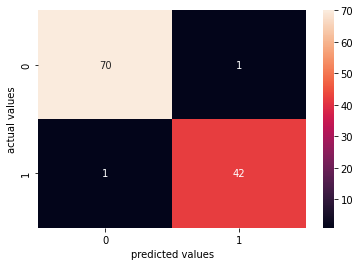

In [ ]:
# Evaluate the selected model on the test set  with confusion matrix
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, pred )
# visualizing confusion matrix
sns.heatmap(conf_matrix, annot = True)
plt.xlabel ('predicted values')
plt.ylabel ('actual values')


From the above results on the test dataset by our model, it predicted 70 benign as True Positives and 1 False Negative (Predicted Benign cell as Malignant) and 1 False Positive (Actually Malignant but predicted as Benign) and 42 True Negatives.

With the ROC curve
The Receiver Operating Characteristic (ROC) Curve is drew by plotting the true positive rate (TPR) against the false positive rate (FPR). The ROC Curve is a probability curve, telling us how much the model able to distinguish between classes, shown by the area under the curve (AUC). Higher the AUC is, the better the model performs. The AUC is expected to greater than 0.5, or over left-top part compared to the baseline.

TPR = TP/P = TP/(TP+FN)
FPR = FP/N = FP/ (FP+TN)

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
# Taking the probability of the class 1 (Malignant) on the test set
pred_prob_c1 = pred_prob[:,1]

# Getting True Positive Rate (tpr) and False Positive Rate (fpr)
fpr, tpr, threshold = roc_curve (y_test,pred_prob_c1, pos_label = 1)

# Computing Area Under the ROC Curve (roc_auc)
roc_auc_score = roc_auc_score (y_test,pred_prob_c1)
roc_auc_score

0.9983622666229938

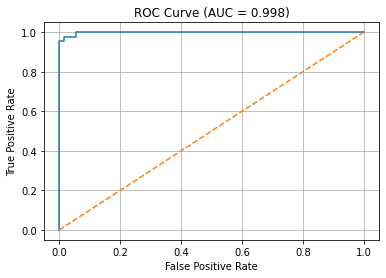

In [ ]:
# Visualizing the ROC Curve
plt.plot( fpr, tpr)
plt.plot([0,1], '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title ("ROC Curve (AUC = {:.3f})".format(roc_auc_score))
plt.grid()
plt.show()

We can see our AUC is very high, very close to 1 which is the ideal point (1.0). That indicates our model has a very good measure of separability between classes.